<a href="https://colab.research.google.com/github/951237/ai_graduate/blob/master/%EB%8C%80%ED%95%99%EC%9B%90_2%ED%95%99%EA%B8%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_210621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 농어 데이터
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 2차원 배열로 바꾸기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [3]:
# 모델 훈련시키기 - k 최근점 이웃으로 나타내기
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

# 길이 50cm 농어 무게 예측하기
print(knr.predict([[50]]))

[1033.33333333]


- 1.033kg으로 예측, 실제 50cm농어 무게는 훨씬더 많이 나감. 문제의 원인은?

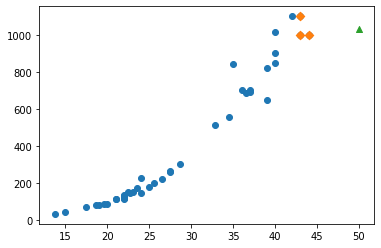

In [4]:
# 최근점 이웃을 산점도로 표시하기
import matplotlib.pyplot as plt

# 50cm 농어 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 50cm 농어 이웃 샘플 산점도 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터 산점도 표시
plt.scatter(50, 1033, marker = '^')
plt.show()


In [5]:
# 선형회귀 알고리즘 적용하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형회귀 모델로 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [6]:
# 기울기와 y 절편 출력하기
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


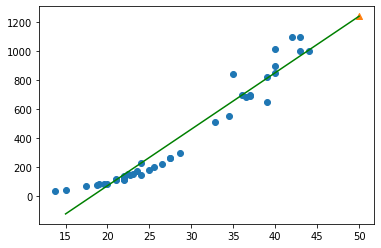

In [7]:
# 농어의 길이 15~50까지의 직선으로 그려보기
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_], color='g')
plt.scatter(50, 1241.8, marker='^')
plt.show()

# 210623 다항회귀

In [ ]:
# 다항회귀 : 최적의 직선보다 최적의 곡선을 찾는 무제임
